In [261]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


## Light sensors


In [262]:
ls1 = ctrl.Antecedent(np.arange(0.0, 1.01, 0.01), "ls1")
ls2 = ctrl.Antecedent(np.arange(0.0, 1.01, 0.01), "ls2")
ls3 = ctrl.Antecedent(np.arange(0.0, 1.01, 0.01), "ls3")

ls1.automf(3, names=["l", "m", "h"])
ls2.automf(3, names=["l", "m", "h"])
ls3.automf(3, names=["l", "m", "h"])

lo = ctrl.Consequent(np.arange(0, 3.01, 0.01), "lo")
lo.defuzzify_method = "mom"

lo["l"] = fuzz.trapmf(lo.universe, [0, 0, 0.5, 1])
lo["m"] = fuzz.trapmf(lo.universe, [0.5, 1, 1.5, 2])
lo["h"] = fuzz.trapmf(lo.universe, [1.5, 2, 3, 3])


In [263]:
l_rules = [
    ctrl.Rule(ls1["l"] & ls2["l"] & ~ls3["h"], lo["l"]),
    ctrl.Rule(ls1["l"] & ~ls2["h"] & ls3["l"], lo["l"]),
    ctrl.Rule(~ls1["h"] & ls2["l"] & ls3["l"], lo["l"]),
    ctrl.Rule(ls1["l"] & ~ls2["h"] & ls3["h"], lo["m"]),
    ctrl.Rule(~ls1["h"] & ls2["h"] & ls3["l"], lo["m"]),
    ctrl.Rule(ls1["h"] & ~ls2["h"] & ls3["l"], lo["m"]),
    ctrl.Rule(ls1["l"] & ls2["h"] & ls3["m"], lo["m"]),
    ctrl.Rule(ls1["m"] & ls2["l"] & ls3["h"], lo["m"]),
    ctrl.Rule(ls1["h"] & ls2["l"] & ls3["m"], lo["m"]),
    ctrl.Rule(ls1["m"] & ls2["m"] & ~ls3["h"], lo["m"]),
    ctrl.Rule(ls1["m"] & ~ls2["h"] & ls3["m"], lo["m"]),
    ctrl.Rule(~ls1["h"] & ls2["m"] & ls3["m"], lo["m"]),
    ctrl.Rule(ls1["h"] & ls2["h"], lo["h"]),
    ctrl.Rule(ls1["h"] & ls3["h"], lo["h"]),
    ctrl.Rule(ls2["h"] & ls3["h"], lo["h"]),
    ctrl.Rule(ls1["h"] & ls2["m"] & ls3["m"], lo["h"]),
    ctrl.Rule(ls1["m"] & ls2["h"] & ls3["m"], lo["h"]),
    ctrl.Rule(ls1["m"] & ls2["m"] & ls3["h"], lo["h"]),
]

lo_ctrl = ctrl.ControlSystem(l_rules)

lo_sim = ctrl.ControlSystemSimulation(lo_ctrl)


In [264]:
# y = []
# y_pred = []

# for l1 in np.arange(0.0, 1.01, 0.05):
#     for l2 in np.arange(0.0, 1.01, 0.05):
#         for l3 in np.arange(0.0, 1.01, 0.05):
#             lo_sim.input["ls1"] = l1
#             lo_sim.input["ls2"] = l2
#             lo_sim.input["ls3"] = l3

#             lo_sim.compute()

#             y_pred.append(0 if lo_sim.output["lo"] <= 0.5 else (1 if lo_sim.output["lo"] <= 1.5 else 2))

#             sum = l1 + l2 + l3

#             y.append(0 if sum <= 0.5 else (1 if sum <= 1.5 else 2))

# c = np.equal(y, y_pred)

# nb_errors = np.size(c) - np.count_nonzero(c)

# print("Numero de erros: " + str(nb_errors))


## PIR sensors


In [265]:
p1 = ctrl.Antecedent(np.arange(0.0, 1.5, 0.5), "p1")
p2 = ctrl.Antecedent(np.arange(0.0, 1.5, 0.5), "p2")

p1["no"] = fuzz.trimf(p1.universe, [0, 0, 0.5])
p1["yes"] = fuzz.trimf(p1.universe, [0.5, 1, 1])

p2["no"] = fuzz.trimf(p2.universe, [0, 0, 0.5])
p2["yes"] = fuzz.trimf(p2.universe, [0.5, 1, 1])

po = ctrl.Consequent(np.arange(0, 1.5, 0.5), "po")
po.defuzzify_method = "mom"

po["no"] = fuzz.trimf(po.universe, [0, 0, 0.5])
po["yes"] = fuzz.trimf(po.universe, [0.5, 1, 1])


In [266]:
p_rules = [
  ctrl.Rule(p1["yes"] | p2["yes"], po["yes"]),
  ctrl.Rule(p1["no"] & p2["no"], po["no"])
]

po_ctrl = ctrl.ControlSystem(p_rules)

po_sim = ctrl.ControlSystemSimulation(po_ctrl)

In [267]:
# y_pir = []
# y_pir_pred = []

# for p1 in [0, 1]:
#     for p2 in [0, 1]:
#         po_sim.input["p1"] = p1
#         po_sim.input["p2"] = p2

#         po_sim.compute()

#         y_pir_pred.append(0 if po_sim.output["po"] <= 0.5 else 1)

#         y_pir.append(0 if (p1 <= 0.5 and p2 <= 0.5) else 1)

#         if y_pir_pred[-1] != y_pir[-1]:
#             print(p1, p2, po_sim.output["po"] <= 0.5)

# nb_errors = np.size(np.equal(y_pir, y_pir_pred)) - np.count_nonzero(np.equal(y_pir, y_pir_pred))

# print("Numero de erros: " + str(nb_errors))


## Mix


In [268]:
lo_mix = ctrl.Antecedent(np.arange(0, 3.01, 0.01), "lo_mix")

lo_mix["l"] = fuzz.trapmf(lo_mix.universe, [0, 0, 0.5, 1])
lo_mix["m"] = fuzz.trapmf(lo_mix.universe, [0.5, 1, 1.5, 2])
lo_mix["h"] = fuzz.trapmf(lo_mix.universe, [1.5, 2, 3, 3])

po_mix = ctrl.Antecedent(np.arange(0, 1.5, 0.5), "po_mix")
po_mix.defuzzify_method = "mom"

po_mix["no"] = fuzz.trimf(po_mix.universe, [0, 0, 0.5])
po_mix["yes"] = fuzz.trimf(po_mix.universe, [0.5, 1, 1])

output = ctrl.Consequent(np.arange(0, 1.5, 0.5), "output")
output.defuzzify_method = "mom"

output["no"] = fuzz.trimf(output.universe, [0, 0, 0.5])
output["yes"] = fuzz.trimf(output.universe, [0.5, 1, 1])

In [269]:
output_rules = [
    ctrl.Rule(lo_mix["l"], output["no"]),
    ctrl.Rule(lo_mix["m"] & po_mix["no"], output["no"]),
    ctrl.Rule(lo_mix["m"] & po_mix["yes"], output["yes"]),
    ctrl.Rule(lo_mix["h"], output["yes"]),
]

output_ctrl = ctrl.ControlSystem(output_rules)

output_sim = ctrl.ControlSystemSimulation(output_ctrl)

2.5000000000000004
0.0
1.0


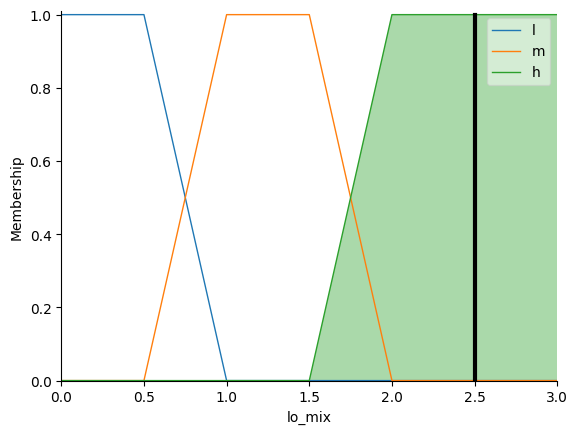

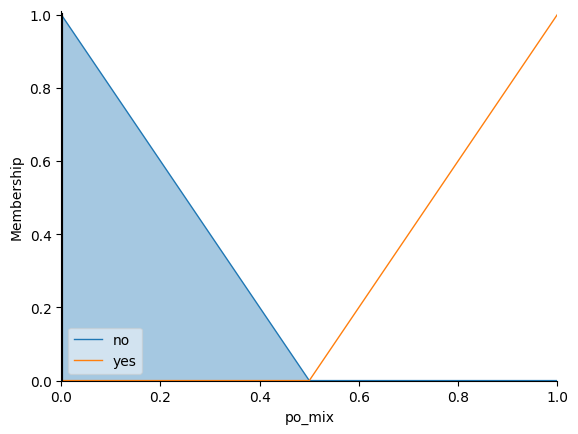

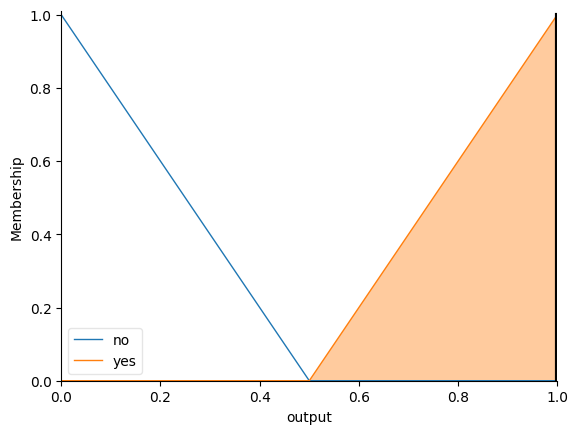

In [275]:
# compute total light
lo_sim.input["ls1"] = 0.5
lo_sim.input["ls2"] = 0.5
lo_sim.input["ls3"] = 1

lo_sim.compute()
lo_mix_in = lo_sim.output['lo']
print(lo_mix_in)

#compute total motion
po_sim.input["p1"] = 0
po_sim.input["p2"] = 0

po_sim.compute()
po_mix_in = po_sim.output['po']
print(po_mix_in)

#compute mix
output_sim.input["lo_mix"] = lo_mix_in
output_sim.input["po_mix"] = po_mix_in